In [1]:
import numpy as np 
import pandas as pd 

### **(1) 출.퇴근시간 유동인구**

In [2]:
# # 제주 시내 유동인구(내국인)

# Jeju_pop = pd.read_csv('Jeju_whole_pop.csv')
# Jeju_pop = Jeju_pop[Jeju_pop['emd_nm'].str.contains('일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개|이호|노형|연동|오라|내도|외도|도평|해안', na=False)]

# Jeju_pop.to_csv('Jeju_pop.csv')

In [3]:
Jeju_pop = pd.read_csv('Jeju_pop.csv')

In [4]:
# 출근시간대 (7 ~ 9)
Jeju_pop_mor = Jeju_pop[(Jeju_pop['time'] == 7)|(Jeju_pop['time'] == 8)|(Jeju_pop['time'] == 9)]
Jeju_pop_mor.head()

,Unnamed: 0,base_date,time,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,pt_year,pt_month
4033,9386,20210101,7,50110510,제주시 일도1동,여성,0,97.9155,0.0000,52.0188,제주,2021,1
4034,9387,20210101,7,50110510,제주시 일도1동,여성,10,83.9276,0.0000,39.7552,제주,2021,1
4035,9388,20210101,7,50110510,제주시 일도1동,여성,20,42.5753,8.5151,73.7972,제주,2021,1
4036,9389,20210101,7,50110510,제주시 일도1동,여성,20,0.0000,0.0000,28.3835,그외,2021,1
4037,9390,20210101,7,50110510,제주시 일도1동,여성,30,100.3640,6.4751,45.3257,제주,2021,1


In [5]:
# 퇴근시간대 (17 ~ 20)
Jeju_pop_ev = Jeju_pop[(Jeju_pop['time'] == 17)|(Jeju_pop['time'] == 18)|(Jeju_pop['time'] == 19)|(Jeju_pop['time'] == 20)]
Jeju_pop_ev.head()

,Unnamed: 0,base_date,time,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,pt_year,pt_month
10834,24746,20210101,17,50110510,제주시 일도1동,여성,0,72.2980,0.0000,156.3802,제주,2021,1
10835,24747,20210101,17,50110510,제주시 일도1동,여성,0,0.0000,0.0000,22.4653,그외,2021,1
10836,24748,20210101,17,50110510,제주시 일도1동,여성,10,61.9697,0.0000,119.5130,제주,2021,1
10837,24749,20210101,17,50110510,제주시 일도1동,여성,10,0.0000,0.0000,17.7056,그외,2021,1
10838,24750,20210101,17,50110510,제주시 일도1동,여성,20,36.9891,42.6798,227.6255,제주,2021,1


- 출근시간

In [6]:
# 평균 

resd_avg = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['resd_pop_cnt'].mean()
resd_sum = resd_avg.groupby(['base_date'], as_index=False)['resd_pop_cnt'].sum()

work_avg = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['work_pop_cnt'].mean()
work_sum = work_avg.groupby(['base_date'], as_index=False)['work_pop_cnt'].sum()

visit_avg = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['visit_pop_cnt'].mean()
visit_sum = visit_avg.groupby(['base_date'], as_index=False)['visit_pop_cnt'].sum()

jeju_pop_avg = pd.DataFrame({'mor_resd_avg' : resd_sum['resd_pop_cnt'], 'mor_work_avg' : work_sum['work_pop_cnt'], 'mor_visit_avg' : visit_sum['visit_pop_cnt']})
mor_jeju_pop_avg = jeju_pop_avg.round(0).astype(int)
mor_jeju_pop_avg


,mor_resd_avg,mor_work_avg,mor_visit_avg
0,22615,898,5077
1,22352,918,5385
2,22386,859,5070
3,21074,1401,5906
4,21153,1422,5787
...,...,...,...
360,19866,1716,7805
361,19315,1745,8135
362,19370,1696,8179
363,19355,1688,8431


In [7]:
# 최댓값

resd_max = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['resd_pop_cnt'].max()
resd_sum = resd_max.groupby(['base_date'], as_index=False)['resd_pop_cnt'].sum()

work_max = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['work_pop_cnt'].max()
work_sum = work_max.groupby(['base_date'], as_index=False)['work_pop_cnt'].sum()

visit_max = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['visit_pop_cnt'].max()
visit_sum = visit_max.groupby(['base_date'], as_index=False)['visit_pop_cnt'].sum()

jeju_pop_max = pd.DataFrame({'mor_resd_max' : resd_sum['resd_pop_cnt'], 'mor_work_max' : work_sum['work_pop_cnt'], 'mor_visit_max' : visit_sum['visit_pop_cnt']})
mor_jeju_pop_max = jeju_pop_max.round(0).astype(int)
mor_jeju_pop_max

,mor_resd_max,mor_work_max,mor_visit_max
0,67297,3395,14408
1,67289,3547,16273
2,67060,3104,14852
3,67703,7928,19725
4,67823,7806,19015
...,...,...,...
360,65691,12254,29501
361,65035,12433,29922
362,64687,11710,30315
363,64626,11609,30531


- 퇴근시간

In [8]:
# 평균

resd_avg = Jeju_pop_ev.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['resd_pop_cnt'].mean()
resd_sum = resd_avg.groupby(['base_date'], as_index=False)['resd_pop_cnt'].sum()

work_avg = Jeju_pop_ev.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['work_pop_cnt'].mean()
work_sum = work_avg.groupby(['base_date'], as_index=False)['work_pop_cnt'].sum()

visit_avg = Jeju_pop_ev.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['visit_pop_cnt'].mean()
visit_sum = visit_avg.groupby(['base_date'], as_index=False)['visit_pop_cnt'].sum()

jeju_pop_avg = pd.DataFrame({'ev_resd_avg' : resd_sum['resd_pop_cnt'], 'ev_work_avg' : work_sum['work_pop_cnt'], 'ev_visit_avg' : visit_sum['visit_pop_cnt']})
ev_jeju_pop_avg = jeju_pop_avg.round(0).astype(int)
ev_jeju_pop_avg

,ev_resd_avg,ev_work_avg,ev_visit_avg
0,18467,1278,8889
1,17462,1481,9651
2,18196,1338,9184
3,16586,2303,10025
4,16648,2288,10026
...,...,...,...
360,15616,2486,11791
361,15089,2576,12234
362,15071,2506,12524
363,15012,2470,12659


In [9]:
# 최댓값

resd_max = Jeju_pop_ev.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['resd_pop_cnt'].max()
resd_sum = resd_max.groupby(['base_date'], as_index=False)['resd_pop_cnt'].sum()

work_max = Jeju_pop_ev.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['work_pop_cnt'].max()
work_sum = work_max.groupby(['base_date'], as_index=False)['work_pop_cnt'].sum()

visit_max = Jeju_pop_ev.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['visit_pop_cnt'].max()
visit_sum = visit_max.groupby(['base_date'], as_index=False)['visit_pop_cnt'].sum()

jeju_pop_max = pd.DataFrame({'ev_resd_max' : resd_sum['resd_pop_cnt'], 'ev_work_max' : work_sum['work_pop_cnt'], 'ev_visit_max' : visit_sum['visit_pop_cnt']})
ev_jeju_pop_max = jeju_pop_max.round(0).astype(int)
ev_jeju_pop_max

,ev_resd_max,ev_work_max,ev_visit_max
0,58892,5041,26453
1,57670,6169,30508
2,59542,5277,29127
3,57837,10904,33780
4,57420,11013,34467
...,...,...,...
360,55089,12523,40361
361,53338,12553,42139
362,53269,12196,43540
363,53063,11929,44282


In [10]:
# # 평균
# resd_pop = Jeju_pop.groupby(['base_date','emd_nm'])['resd_pop_cnt'].sum().unstack()
# resd_pop = resd_pop.reset_index(drop=False)

# work_pop = Jeju_pop.groupby(['base_date','emd_nm'])['work_pop_cnt'].sum().unstack()
# work_pop = work_pop.reset_index(drop=False)

# visit_pop = Jeju_pop.groupby(['base_date','emd_nm'])['visit_pop_cnt'].sum().unstack()
# visit_pop = visit_pop.reset_index(drop=False)

In [11]:
# # 144으로 나눠 평균 구하기 (시간(4), 성별(2), 나이(9), 지역(2) = 144)

# def div_144(x):
#     x = x/144
#     return x 

In [12]:
# resd = resd_pop.drop(['base_date'], axis=1).sum(axis=1).map(div_144)
# work = work_pop.drop(['base_date'], axis=1).sum(axis=1).map(div_144)
# visit = visit_pop.drop(['base_date'], axis=1).sum(axis=1).map(div_144)

In [13]:
# jeju_pop_avg = pd.DataFrame({'base_date' : resd_pop['base_date'], 'resd_pop_avg' : resd, 'work_pop_avg' : work, 'visit_pop_avg' : visit})
# jeju_pop_avg = jeju_pop_avg.round(0).astype(int)
# jeju_pop_avg

### **(2) 모델링**

훈련 / 검증 데이터 split

모델

- 윈도우(x, y+1)

In [14]:
# xgboost를 이용한 윈도우 예측 
#  https://superhky.tistory.com/89

In [15]:
# df
# x = feature
# y = label 

In [16]:
# 앞으로 옮길 columns에 shift
# df['feature_n'] = df['feature'].shift(1)

In [18]:
# ex)
# jeju_pop_max['visit_pop_max_2'] = jeju_pop_max['visit_pop_max'].shift(1)
# jeju_pop_max

In [19]:
# 랜덤포레스트  # 30일 기준
# https://direction-f.tistory.com/17

# ex)
jeju_pop_max['visit_pop_max_2'] = jeju_pop_max['visit_pop_max'].shift(30)
jeju_pop_max

KeyError: 'visit_pop_max'

In [ ]:
# # # 30일 data를 하나의 row로 구성 
# # # 30일치로 > 그 다음 30일을 예측, 결과는 일별로 나와야 함 

# feature_list = []
# label_list = []

# for i in range(len(jeju_pop_max)-30):   # 마지막 30개가 비게 됨 (예측할 x)
#     feature_list.append(np.array(jeju_pop_max.iloc[i:i+30][['resd_pop_max', 'work_pop_max', 'visit_pop_max']])) # 다변량은 어떻게 해야 하지 
#     label_list.append(np.array(jeju_pop_max.iloc[i+30:i+60]['visit_pop_max_2']))

# X = np.array(feature_list)
# Y = np.array(label_list)

<ipython-input-47-b9a8cb615b6f>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array(label_list)


In [ ]:
# train_data, train_label = X[:-30], Y[:-30]  # 마지막 30개 남겨두고 train데이터로 
# test_data, test_label = X[-30:], Y[-30:]

# train_data = pd.DataFrame(train_data)
# train_data
# # train_label = pd.DataFrame(train_label)
# # # test_data = pd.DataFrame(test_data)
# # test_label = pd.DataFrame(test_label)

In [ ]:
# train_label = pd.DataFrame(train_label)
# train_label.shape # (305, 1) # 라벨도 같은 형태여야 하지 않나 
# train_data.shape # (305, 30, 1)

In [ ]:
# # # 30일 data를 하나의 row로 구성 
# # # 30일치로 > 그 다음 30일을 예측, 결과는 일별로 나와야 함 

feature_list1 = []
feature_list2 = []
feature_list3 = []
label_list = []

for i in range(len(jeju_pop_max)-30):   # 마지막 30개가 비게 됨 (예측할 x)
    feature_list1.append(np.array(jeju_pop_max.iloc[i:i+30]['resd_pop_max'])) # 다변량은 어떻게 해야 하지 
    label_list.append(np.array(jeju_pop_max.iloc[i+30:i+60]['visit_pop_max_2']))

X1 = np.array(feature_list1)
Y = np.array(label_list)

NameError: name 'jeju_pop_max' is not defined

In [ ]:
train_data, train_label = X1[:-30], Y[:-30]  # 마지막 30개 남겨두고 train데이터로 
test_data, test_label = X1[-30:], Y[-30:]

# train_data = pd.DataFrame(train_data)
train_label = pd.DataFrame(train_label)
# # # test_data = pd.DataFrame(test_data)
# # test_label = pd.DataFrame(test_label)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,58892,57670,59542,57837,57420,57628,62324,62365,61277,61041,...,55442,54925,55714,56513,55285,55764,54433,55656,54527,52864
1,57670,59542,57837,57420,57628,62324,62365,61277,61041,58023,...,54925,55714,56513,55285,55764,54433,55656,54527,52864,55521
2,59542,57837,57420,57628,62324,62365,61277,61041,58023,57175,...,55714,56513,55285,55764,54433,55656,54527,52864,55521,58142
3,57837,57420,57628,62324,62365,61277,61041,58023,57175,56548,...,56513,55285,55764,54433,55656,54527,52864,55521,58142,56722
4,57420,57628,62324,62365,61277,61041,58023,57175,56548,55950,...,55285,55764,54433,55656,54527,52864,55521,58142,56722,56398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,52583,51542,51158,54171,54538,54337,54066,53716,52518,52486,...,54327,53663,52003,50589,54648,54419,53885,53164,52737,51923
301,51542,51158,54171,54538,54337,54066,53716,52518,52486,55669,...,53663,52003,50589,54648,54419,53885,53164,52737,51923,50040
302,51158,54171,54538,54337,54066,53716,52518,52486,55669,54980,...,52003,50589,54648,54419,53885,53164,52737,51923,50040,54351
303,54171,54538,54337,54066,53716,52518,52486,55669,54980,54447,...,50589,54648,54419,53885,53164,52737,51923,50040,54351,53556


In [ ]:
train_label.shape()

In [ ]:
train_label = pd.DataFrame(train_label)
train_label

,0
0,"[26453.0, 30508.0, 29127.0, 33780.0, 34467.0, ..."
1,"[30508.0, 29127.0, 33780.0, 34467.0, 34481.0, ..."
2,"[29127.0, 33780.0, 34467.0, 34481.0, 25572.0, ..."
3,"[33780.0, 34467.0, 34481.0, 25572.0, 26792.0, ..."
4,"[34467.0, 34481.0, 25572.0, 26792.0, 27412.0, ..."
...,...
300,"[46704.0, 47814.0, 45351.0, 41223.0, 43784.0, ..."
301,"[47814.0, 45351.0, 41223.0, 43784.0, 43505.0, ..."
302,"[45351.0, 41223.0, 43784.0, 43505.0, 43749.0, ..."
303,"[41223.0, 43784.0, 43505.0, 43749.0, 43973.0, ..."


In [ ]:
# https://dining-developer.tistory.com/32?category=929228
# ex)
jeju_pop_max['visit_pop_max_2'] = jeju_pop_max['visit_pop_max'].shift(30)
jeju_pop_max

,resd_pop_max,work_pop_max,visit_pop_max,visit_pop_max_2
0,58892,5041,26453,NaN
1,57670,6169,30508,NaN
2,59542,5277,29127,NaN
3,57837,10904,33780,NaN
4,57420,11013,34467,NaN
...,...,...,...,...
360,55089,12523,40361,44012.0
361,53338,12553,42139,40997.0
362,53269,12196,43540,42623.0
363,53063,11929,44282,43060.0


In [ ]:
# from sklearn.model_selection import train_test_split

# feature_cols = ['work_pop_avg', 'work_pop_max', 'holiday']
# label_cols = ['user_count']

# feature = data[feature_cols]
# label = data[label_cols]

# feature_list = []
# label_list = []

# for i in range(len(data) - 30):
#     feature_list.append(np.array(feature.iloc[i:i+30]))
#     label_list.append(np.array(label.iloc[i+30:i+60]))

# data_df = pd.DataFrame({'X':feature_list,'Y':label_list})
# data_df

# 365일이 홀수라 남아버림 

,X,Y
0,"[[1053, 5296, 1], [1158, 6393, 1], [1052, 5525...","[[14097], [17909], [20081], [20396], [20022], ..."
1,"[[1158, 6393, 1], [1052, 5525, 1], [1733, 1115...","[[17909], [20081], [20396], [20022], [20278], ..."
2,"[[1052, 5525, 1], [1733, 11151, 0], [1742, 112...","[[20081], [20396], [20022], [20278], [17106], ..."
3,"[[1733, 11151, 0], [1742, 11214, 0], [1727, 11...","[[20396], [20022], [20278], [17106], [14934], ..."
4,"[[1742, 11214, 0], [1727, 11100, 0], [1604, 10...","[[20022], [20278], [17106], [14934], [19975], ..."
...,...,...
330,"[[1248, 7493, 1], [1084, 6361, 1], [2111, 1604...","[[21476], [16422], [5769], [16949], [5448]]"
331,"[[1084, 6361, 1], [2111, 16049, 0], [2127, 159...","[[16422], [5769], [16949], [5448]]"
332,"[[2111, 16049, 0], [2127, 15927, 0], [2281, 16...","[[5769], [16949], [5448]]"
333,"[[2127, 15927, 0], [2281, 16734, 0], [2285, 16...","[[16949], [5448]]"


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [ ]:
# 실제 데이터
data = pd.read_csv('data.csv')
data.head()

,base_date,user_id,bus_user_id,daily_rainfall,highest_temperature,lowest_temperature,season,average_time,average_speed,resd_pop_avg,work_pop_avg,visit_pop_avg,resd_pop_max,work_pop_max,visit_pop_max,local_fore,holiday,user_count
0,2021-01-01,39917.0,29500.0,0.0,6.4,2.9,4,51.159975,41.835915,20915,1053,6559,69710,5296,26862,15356,1,10560
1,2021-01-02,46504.0,32923.0,0.0,8.3,-0.4,4,51.159975,41.835915,20311,1158,7064,69832,6393,31174,9487,1,13478
2,2021-01-03,40363.0,29609.0,0.0,5.6,-0.3,4,51.159975,41.835915,20679,1052,6643,71123,5525,29685,12205,1,11289
3,2021-01-04,56586.0,39357.0,0.0,9.1,0.6,4,51.159975,41.835915,19544,1733,7299,71426,11151,35124,11894,0,17934
4,2021-01-05,54109.0,39455.0,0.5,7.9,1.8,4,51.159975,41.835915,19591,1742,7272,71233,11214,35460,11004,0,17099


In [ ]:
data = data[['work_pop_avg', 'work_pop_max', 'holiday', 'user_count']] 
data.head()

,work_pop_avg,work_pop_max,holiday,user_count
0,1053,5296,1,10560
1,1158,6393,1,13478
2,1052,5525,1,11289
3,1733,11151,0,17934
4,1742,11214,0,17099


<AxesSubplot:>

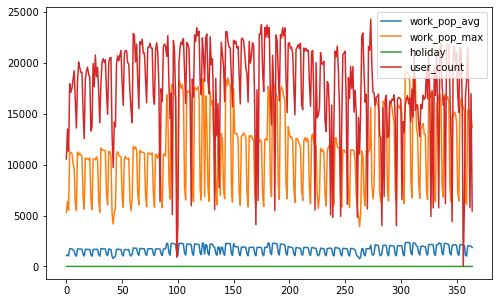

In [ ]:
data.plot(figsize=(8,5))

In [ ]:
# work_pop_avg/max , holiday, user_count 만 사용 
data['user_count'] = data['user_count'].shift(30)
data = data[['work_pop_avg', 'work_pop_max', 'holiday', 'user_count']] 
data.head()

,work_pop_avg,work_pop_max,holiday,user_count
0,1053,5296,1,NaN
1,1158,6393,1,NaN
2,1052,5525,1,NaN
3,1733,11151,0,NaN
4,1742,11214,0,NaN


In [ ]:
# 2021년 전체로 >> 이후 30일 예측 

In [ ]:
# 홀드아웃

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = )


In [ ]:
1 ~ 12월